# Analise de dados e criação de modelos para auxiliar na tomada de decisão

Este notebook tem como objetivo explorar alguns dados fornecidos pela empresa Olist de forma aberta, atraves da plataforma [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download]), e iremos extrair deles informações e mapear comportamentos.

Os dados expoem informações de 2016 a 2018.

Olist, &amp; André Sionek. (2018). <i>Brazilian E-Commerce Public Dataset by Olist</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/195341

## Datasets disponiveis para análise

* Clientes
* Geolocalização
* Pedidos e Items dos Pedidos
* Vendedores
* Produtos
* Pagamentos
* Reviews

## Estrutura dos dados

In [1]:
#!pip install pyarrow -q
#!pip install scipy

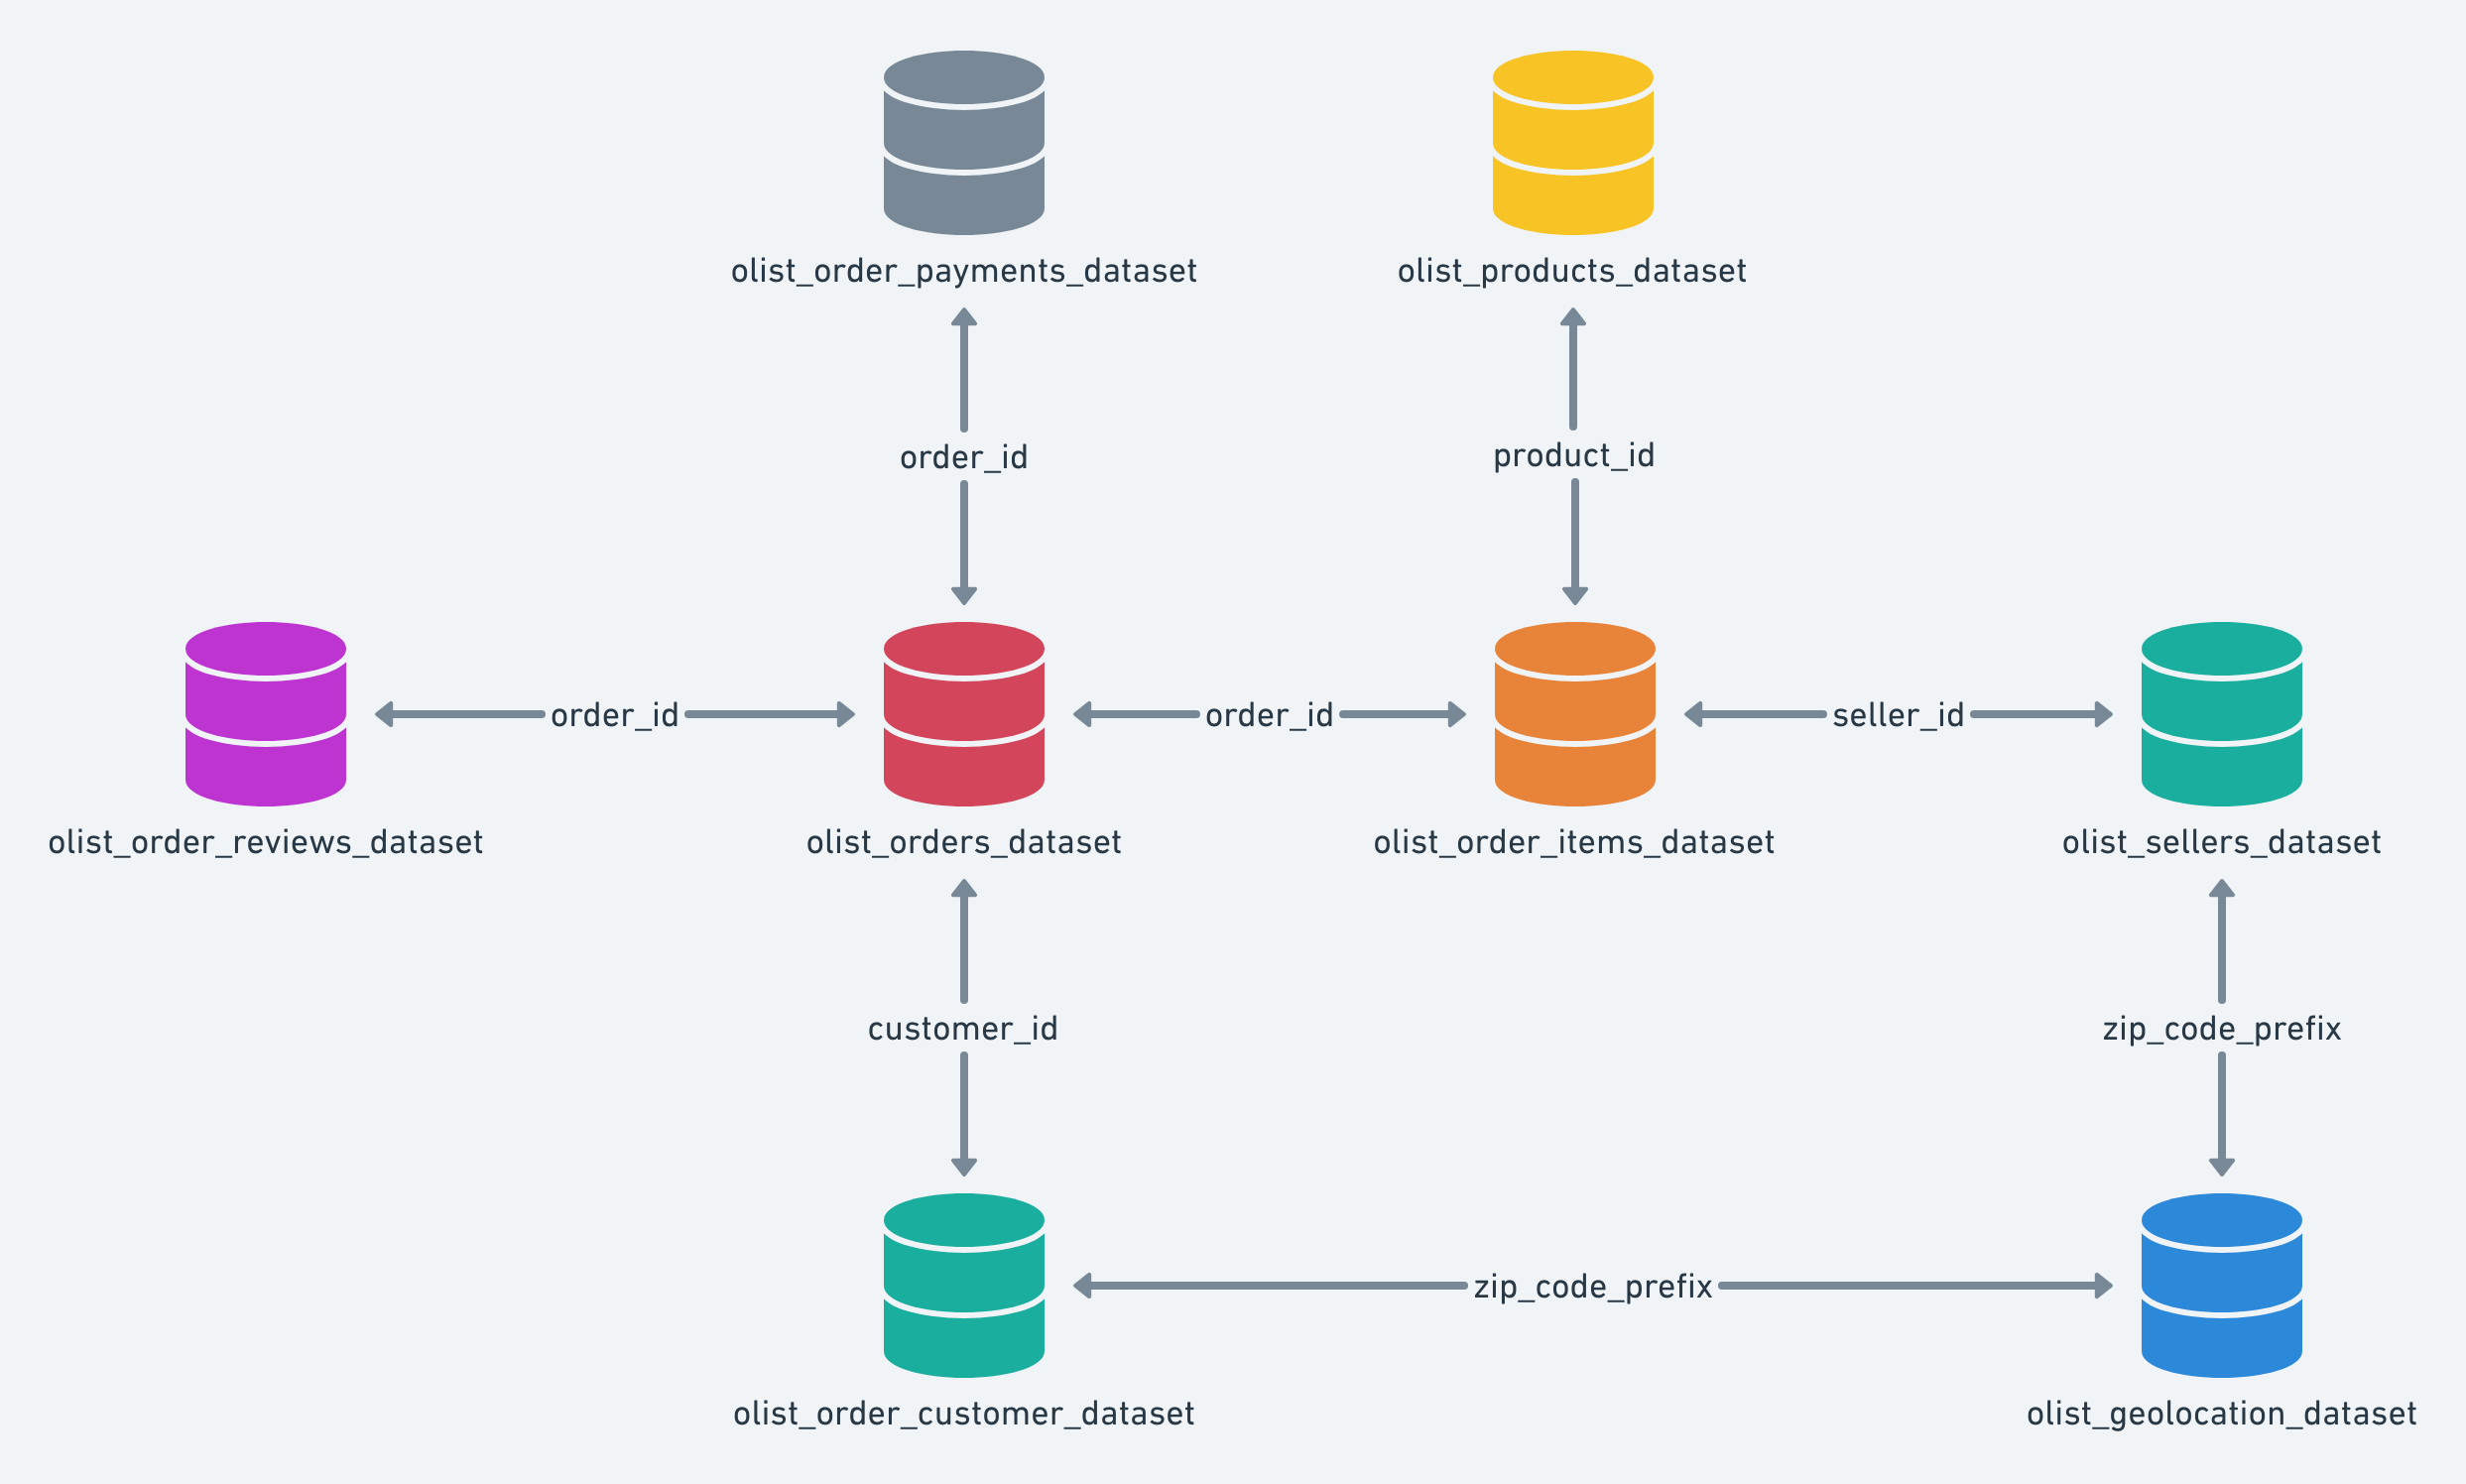

In [2]:
from IPython import display
display.Image("arquitetura.png")

## Carregamento dos dados

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from datetime import timedelta, datetime
from matplotlib import pyplot as plt
from matplotlib.style import use, available

In [6]:
available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [7]:
use('seaborn-v0_8-paper')
plt.rcParams['figure.figsize'] = [12,8]

In [8]:
%load_ext watermark
%watermark

Last updated: 2023-11-16T23:45:48.250119-03:00

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.14.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [9]:
%watermark --iversion

numpy     : 1.22.4
seaborn   : 0.12.2
IPython   : 8.14.0
pandas    : 1.5.3
matplotlib: 3.7.1
scipy     : 1.11.3



In [10]:
raiz = './data/'

In [11]:
pd.options.mode.chained_assignment = None

## Datasets

## Análise do dataset de `Order`

In [12]:
df_order = pd.read_csv(raiz + 'olist_orders_dataset.csv', sep=',')
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
df_order['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [15]:
df_order['order_status'] = pd.Categorical(df_order['order_status'], categories=['created', 'invoiced', 'approved', 'processing', 'shipped', 'delivered', 'canceled', 'unavailable'])

In [16]:
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'], infer_datetime_format=True)
df_order['order_approved_at'] = pd.to_datetime(df_order['order_approved_at'], infer_datetime_format=True)
df_order['order_delivered_carrier_date'] = pd.to_datetime(df_order['order_delivered_carrier_date'], infer_datetime_format=True)
df_order['order_delivered_customer_date'] = pd.to_datetime(df_order['order_delivered_customer_date'], infer_datetime_format=True)
df_order['order_estimated_delivery_date'] = pd.to_datetime(df_order['order_estimated_delivery_date'], infer_datetime_format=True)

In [17]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


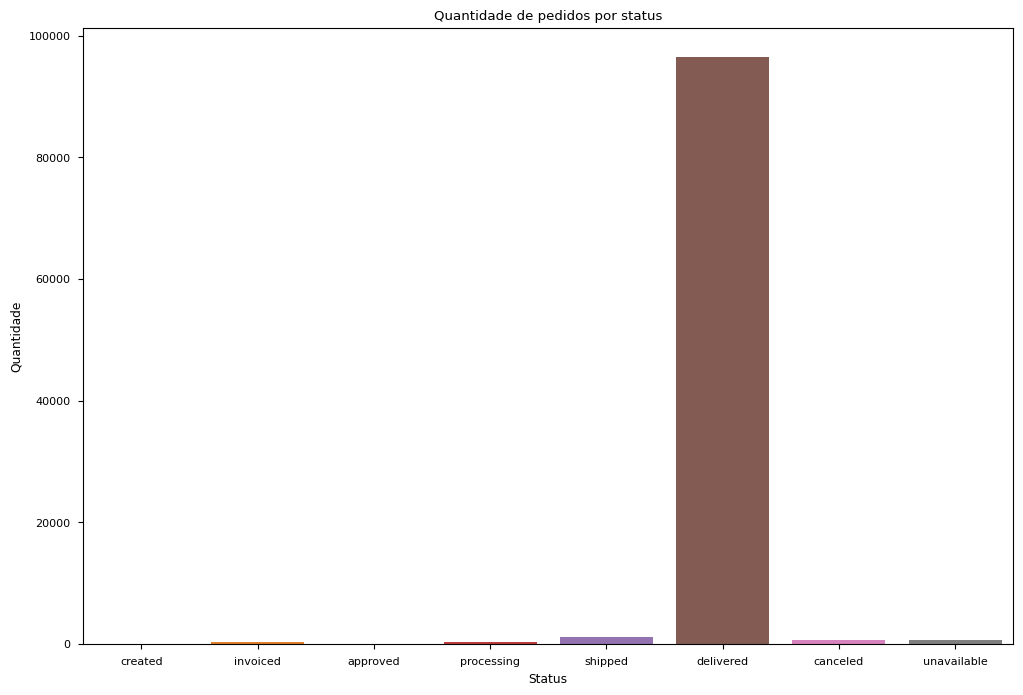

In [18]:
plt.title('Quantidade de pedidos por status')
sns.countplot(df_order, x='order_status')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.show()

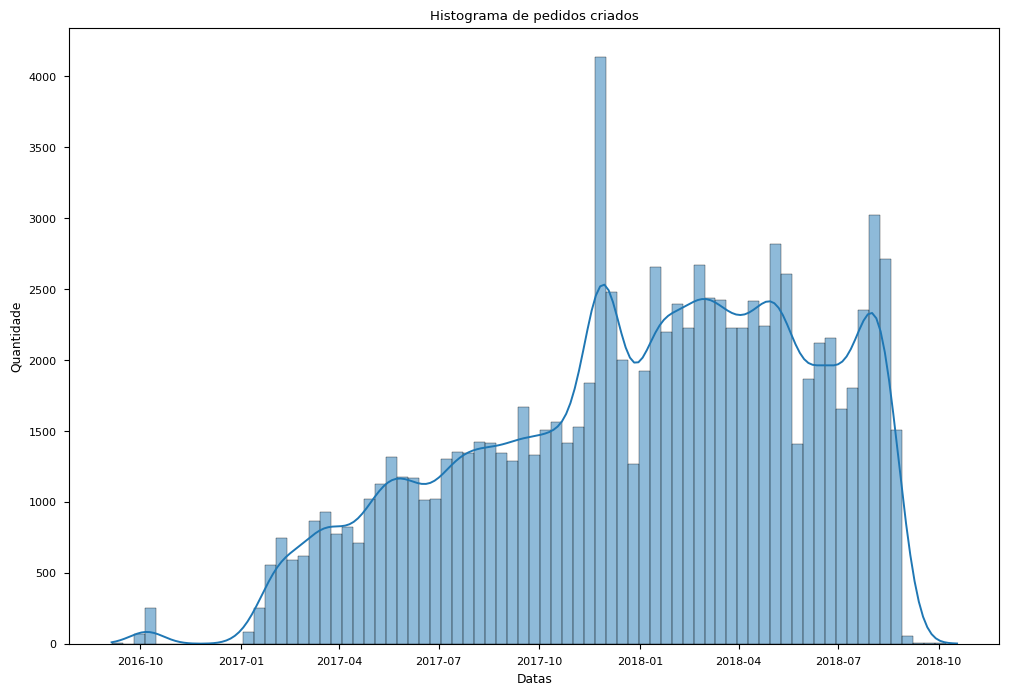

In [19]:
plt.title('Histograma de pedidos criados')
sns.histplot(df_order, x='order_purchase_timestamp', kde=True)
plt.xlabel('Datas')
plt.ylabel('Quantidade')
plt.show()

In [20]:
df_delivery = df_order[['order_id', 'order_purchase_timestamp']]
df_delivery.columns = ['order_id', 'order_created_at']
df_delivery.head()

,order_id,order_created_at
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39


In [21]:
def convert_timedelta_to_decimal(time: timedelta):
    if time.total_seconds() < 0:
        return None
    return time.total_seconds() / 3600 

In [22]:
def convert_decimal_to_date(time: float):
    hours = int(time)
    dias = hours % 24
    minutes = (time*60) % 60
    seconds = (time*3600) % 60

    return "%d - %d:%02d.%02d" % (dias, hours, minutes, seconds)

In [23]:
df_delivery['time_to_approve'] = (df_order['order_approved_at'] - df_order['order_purchase_timestamp']).apply(convert_timedelta_to_decimal)
df_delivery['time_to_carrier'] = (df_order['order_delivered_carrier_date'] - df_order['order_approved_at']).apply(convert_timedelta_to_decimal)
df_delivery['time_to_delivery'] = (df_order['order_delivered_customer_date'] - df_order['order_delivered_carrier_date']).apply(convert_timedelta_to_decimal)

In [24]:
df_delivery['time_total'] = df_delivery['time_to_approve'] + df_delivery['time_to_carrier'] + df_delivery['time_to_delivery']
df_delivery.head()

,order_id,order_created_at,time_to_approve,time_to_carrier,time_to_delivery,time_total
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,0.178333,56.795833,145.503611,202.477778
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,30.713889,11.109167,288.945833,330.768889
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,0.276111,4.910278,220.274722,225.461111
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,0.298056,89.900000,226.811944,317.010000
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,1.030556,21.434722,46.507778,68.973056


In [25]:
def compare_dates(row):
    delivery: datetime  = row['delivery_date']
    estimated: datetime = row['calculated_date_estimated']

    if pd.isnull(delivery) | pd.isnull(estimated):
        return None
    
    a = datetime(delivery.year, delivery.month, delivery.day, delivery.hour, delivery.minute, delivery.second)
    b = datetime(estimated.year, estimated.month, estimated.day, estimated.hour, estimated.minute, estimated.second)
    diff = (a - b).seconds

    return diff <= 1

In [26]:
df_delivery_test = df_delivery[['order_id', 'order_created_at']]
df_delivery_test['delivery_date'] = df_order.loc[:, 'order_delivered_customer_date']
df_delivery_test['delivery_estimated_date'] = df_order.loc[:,'order_estimated_delivery_date']
df_delivery_test['calculated_date_estimated'] = pd.to_datetime(df_delivery_test.loc[:,'order_created_at'] + pd.to_timedelta(df_delivery['time_total'], unit='hour'))
df_delivery_test['validate_time'] = df_delivery_test.apply(compare_dates, axis=1)

In [27]:
df_delivery_test[df_delivery_test['validate_time'] == False]

,order_id,order_created_at,delivery_date,delivery_estimated_date,calculated_date_estimated,validate_time


In [28]:
info = df_delivery[['time_to_approve', 'time_to_carrier', 'time_to_delivery']].describe()
info

,time_to_approve,time_to_carrier,time_to_delivery
count,99281.000000,96285.000000,96452.000000
mean,10.419094,68.620465,224.005234
std,26.038004,83.965777,210.211793
min,0.000000,0.004167,0.000000
25%,0.215000,21.636944,98.436597
50%,0.343333,44.440000,170.407500
75%,14.580833,86.977222,288.730625
max,4509.180556,3018.301667,4924.583333


In [29]:
stats.jarque_bera(df_delivery['time_to_approve'].dropna())

SignificanceResult(statistic=344310051467.5897, pvalue=0.0)

In [30]:
stats.jarque_bera(df_delivery['time_to_carrier'].dropna())

SignificanceResult(statistic=15547285.51199038, pvalue=0.0)

In [31]:
stats.jarque_bera(df_delivery['time_to_delivery'].dropna())

SignificanceResult(statistic=11669815.555194538, pvalue=0.0)

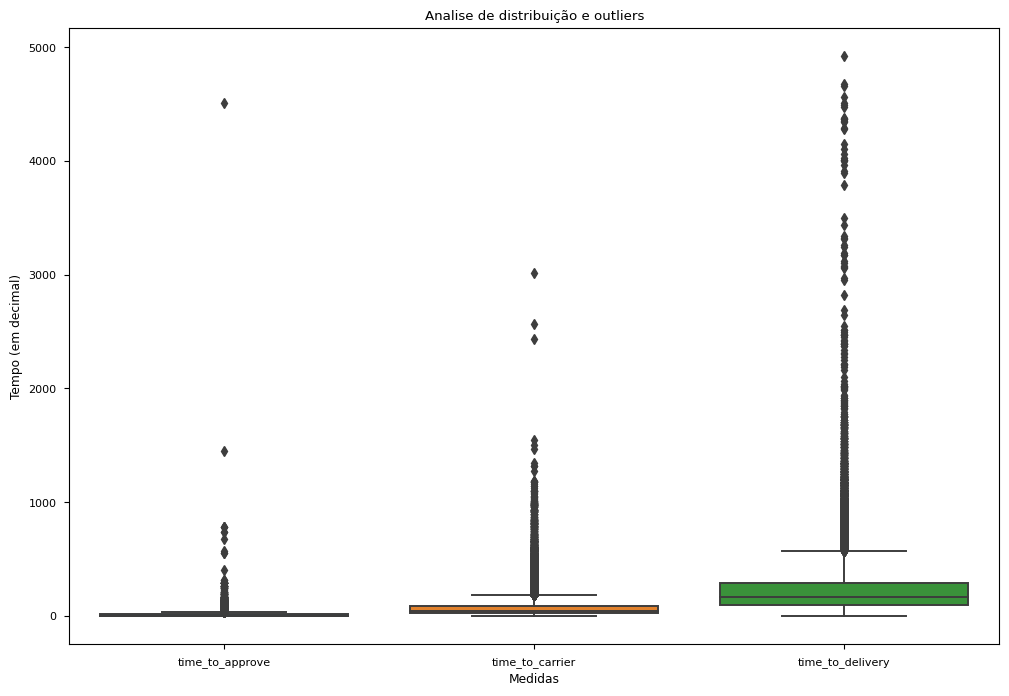

In [32]:
plt.title('Analise de distribuição e outliers')
sns.boxplot(df_delivery[['time_to_approve', 'time_to_carrier', 'time_to_delivery']])
plt.xlabel('Medidas')
plt.ylabel('Tempo (em decimal)')
plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_12224\2605209522.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_delivery.corr()


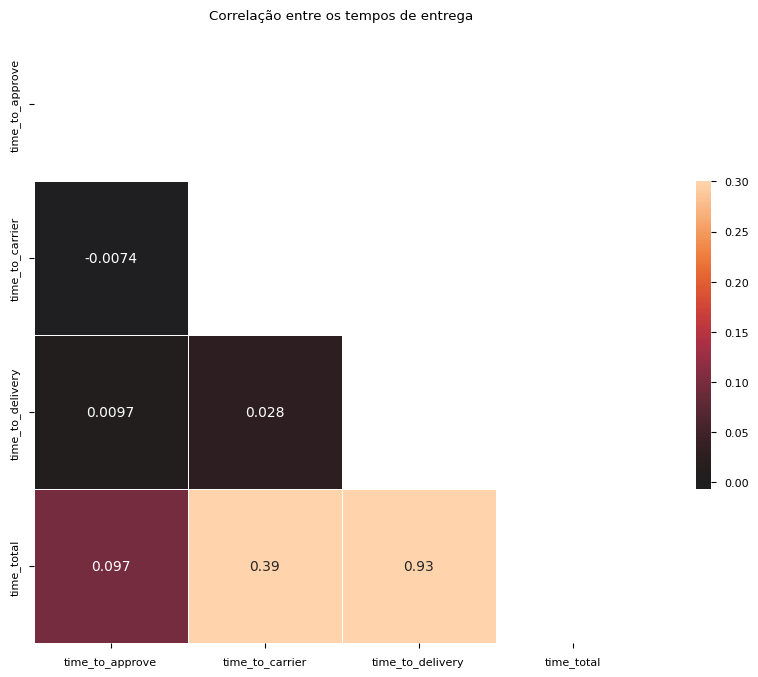

In [33]:
corr = df_delivery.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title('Correlação entre os tempos de entrega')
sns.heatmap(corr,  annot=True, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

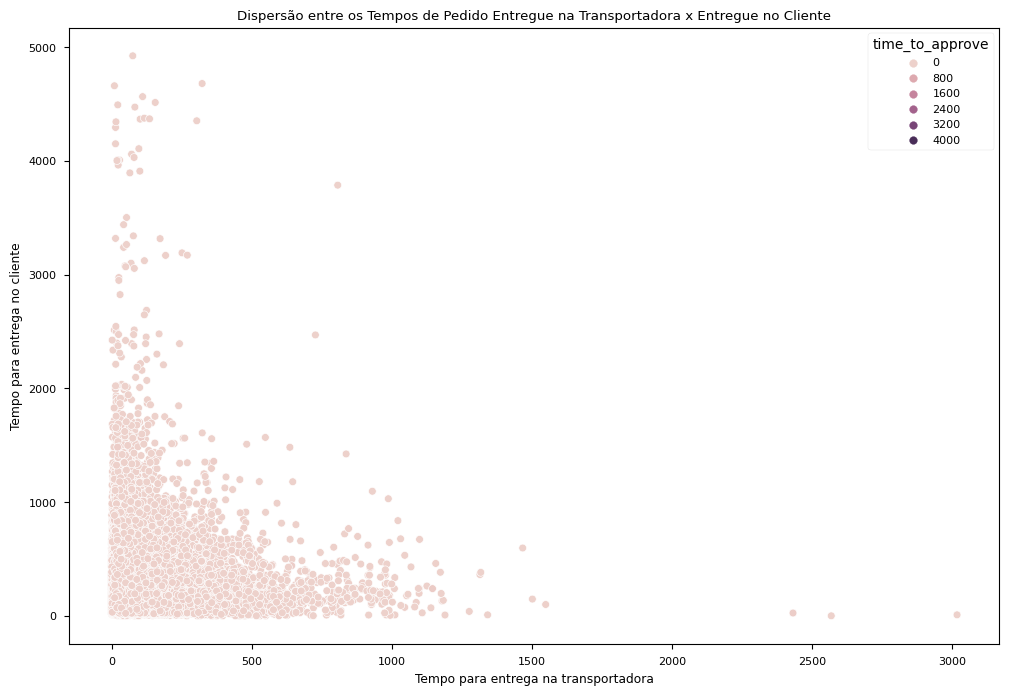

In [34]:
plt.title('Dispersão entre os Tempos de Pedido Entregue na Transportadora x Entregue no Cliente')
sns.scatterplot(df_delivery, x='time_to_carrier', y='time_to_delivery', hue='time_to_approve')
plt.xlabel('Tempo para entrega na transportadora')
plt.ylabel('Tempo para entrega no cliente')
plt.show()

In [35]:
df_delivery['customer_id'] = df_order['customer_id']
df_delivery['order_status'] = df_order['order_status']
df_delivery.head()

,order_id,order_created_at,time_to_approve,time_to_carrier,time_to_delivery,time_total,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,0.178333,56.795833,145.503611,202.477778,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,30.713889,11.109167,288.945833,330.768889,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,0.276111,4.910278,220.274722,225.461111,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,0.298056,89.900000,226.811944,317.010000,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,1.030556,21.434722,46.507778,68.973056,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


## Análise do dataset de `Order Items`

In [36]:
df_order_items = pd.read_csv(raiz + 'olist_order_items_dataset.csv', sep=',')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [37]:
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'], infer_datetime_format=True)
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [38]:
df_cost_items_order = df_order_items.groupby(['order_id']).aggregate({'order_item_id': ['count'], 'price': ['sum', 'mean', 'median', 'std'], 'freight_value': ['sum', 'mean', 'median', 'std']}).sort_values([('order_item_id', 'count')], ascending=False)
df_cost_items_order

order_item_id    price                      \
                                         count      sum        mean  median   
order_id                                                                      
8272b63d03f5f79c56e9e4120aec44ef            21    31.80    1.514286    1.20   
1b15974a0141d54e36626dca3fdc731a            20  2000.00  100.000000  100.00   
ab14fdcfbe524636d65ee38360e22ce8            20  1974.00   98.700000   98.70   
9ef13efd6949e4573a18964dd1bbe7f5            15   765.00   51.000000   51.00   
428a2f660dc84138d969ccd69a0ab6d5            15   982.35   65.490000   65.49   
...                                        ...      ...         ...     ...   
5a0911d70c1f85d3bed0df1bf693a6dd             1    59.00   59.000000   59.00   
5a082b558a3798d3e36d93bfa8ca1eae             1     9.00    9.000000    9.00   
5a07264682e0b8fbb3f166edbbffc6e8             1    19.90   19.900000   19.90   
5a071192a28951b76774e5a760c8c9b7             1   899.00  899.000000  899.00   
fffe41c64501cc87c801fd61db3f6244             1    43.00   43.000000   43.00   

                                           freight_value                      \
                                       std           sum        mean  median   
order_id                                                                       
8272b63d03f5f79c56e9e4120aec44ef  1.440238        164.37    7.827143    7.89   
1b15974a0141d54e36626dca3fdc731a  0.000000        202.40   10.120000   10.12   
ab14fdcfbe524636d65ee38360e22ce8  0.000000        288.80   14.440000   14.44   
9ef13efd6949e4573a18964dd1bbe7f5  0.000000         18.00    1.200000    1.20   
428a2f660dc84138d969ccd69a0ab6d5  0.000000        243.30   16.220000   16.22   
...                                    ...           ...         ...     ...   
5a0911d70c1f85d3bed0df1bf693a6dd       NaN         51.13   51.130000   51.13   
5a082b558a3798d3e36d93bfa8ca1eae       NaN         15.23   15.230000   15.23   
5a07264682e0b8fbb3f166edbbffc6e8       NaN         19.32   19.320000   19.32   
5a071192a28951b76774e5a760c8c9b7       NaN        106.43  106.430000  106.43   
fffe41c64501cc87c801fd61db3f6244       NaN         12.79   12.790000   12.79   

                                            
                                       std  
order_id                                    
8272b63d03f5f79c56e9e4120aec44ef  0.288048  
1b15974a0141d54e36626dca3fdc731a  0.000000  
ab14fdcfbe524636d65ee38360e22ce8  0.000000  
9ef13efd6949e4573a18964dd1bbe7f5  0.000000  
428a2f660dc84138d969ccd69a0ab6d5  0.000000  
...                                    ...  
5a0911d70c1f85d3bed0df1bf693a6dd       NaN  
5a082b558a3798d3e36d93bfa8ca1eae       NaN  
5a07264682e0b8fbb3f166edbbffc6e8       NaN  
5a071192a28951b76774e5a760c8c9b7       NaN  
fffe41c64501cc87c801fd61db3f6244       NaN  

[98666 rows x 9 columns]

In [39]:
df_cost_items_order = df_cost_items_order[[('order_item_id', 'count'), ('price', 'sum'), ('freight_value', 'sum')]]
df_cost_items_order.columns = df_cost_items_order.columns.droplevel(0)
df_cost_items_order.columns = ['total_items', 'total_price', 'total_freigth']
df_cost_items_order.reset_index(inplace=True)
df_cost_items_order.head()

,order_id,total_items,total_price,total_freigth
0,8272b63d03f5f79c56e9e4120aec44ef,21,31.80,164.37
1,1b15974a0141d54e36626dca3fdc731a,20,2000.00,202.40
2,ab14fdcfbe524636d65ee38360e22ce8,20,1974.00,288.80
3,9ef13efd6949e4573a18964dd1bbe7f5,15,765.00,18.00
4,428a2f660dc84138d969ccd69a0ab6d5,15,982.35,243.30


In [40]:
df_cost_items_order.describe()

,total_items,total_price,total_freigth
count,98666.000000,98666.000000,98666.000000
mean,1.141731,137.754076,22.823562
std,0.538452,210.645145,21.650909
min,1.000000,0.850000,0.000000
25%,1.000000,45.900000,13.850000
50%,1.000000,86.900000,17.170000
75%,1.000000,149.900000,24.040000
max,21.000000,13440.000000,1794.960000


In [41]:
stats.jarque_bera(df_cost_items_order['total_items'])

SignificanceResult(statistic=55153744.53592497, pvalue=0.0)

In [42]:
stats.jarque_bera(df_cost_items_order['total_price'])

SignificanceResult(statistic=292556666.9859795, pvalue=0.0)

In [43]:
stats.jarque_bera(df_cost_items_order['total_freigth'])

SignificanceResult(statistic=1316203897.5174754, pvalue=0.0)

C:\Users\angel\AppData\Local\Temp\ipykernel_12224\519767505.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(311)


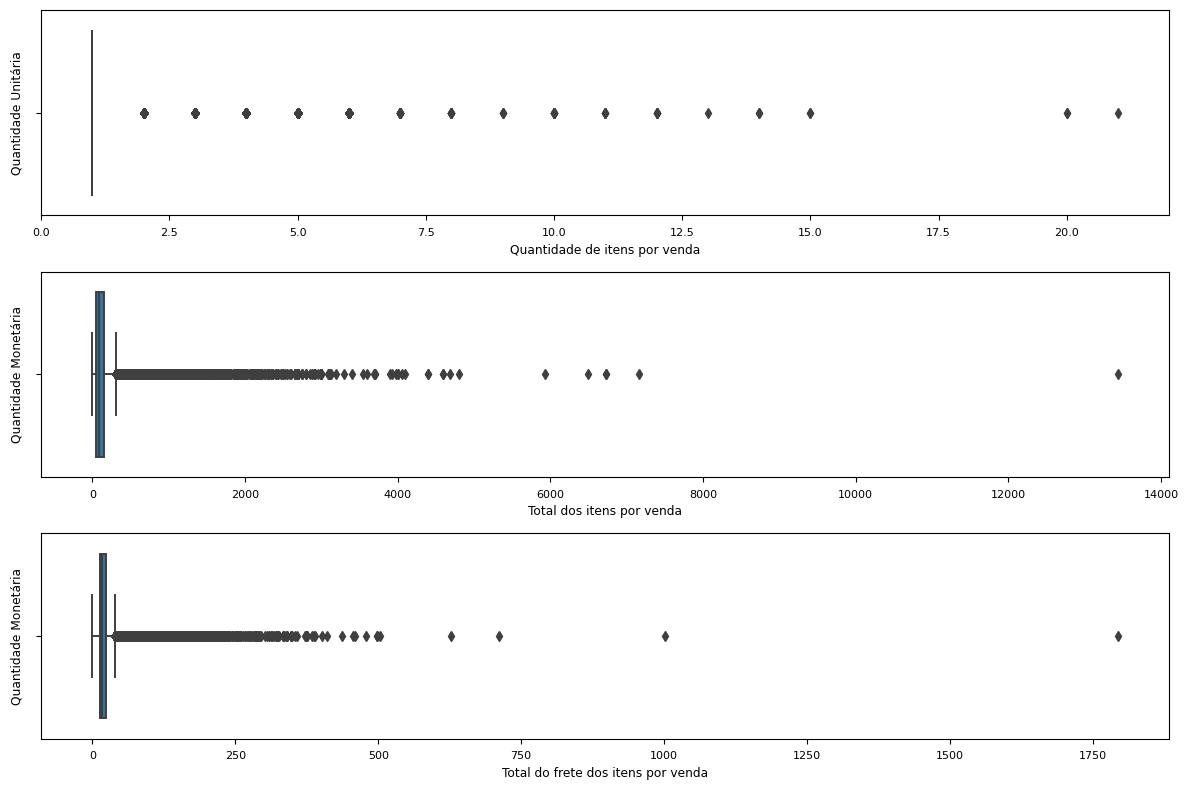

In [44]:
plt.figure(figsize=(12,8))
plt.title('Analise de outliers e distribuição')

plt.subplot(311)
sns.boxplot(df_cost_items_order, x='total_items')
plt.xlabel('Quantidade de itens por venda')
plt.ylabel('Quantidade Unitária')

plt.subplot(312)
sns.boxplot(df_cost_items_order, x='total_price')
plt.xlabel('Total dos itens por venda')
plt.ylabel('Quantidade Monetária')

plt.subplot(313)
sns.boxplot(df_cost_items_order, x='total_freigth')
plt.xlabel('Total do frete dos itens por venda')
plt.ylabel('Quantidade Monetária')

plt.tight_layout()
plt.show()

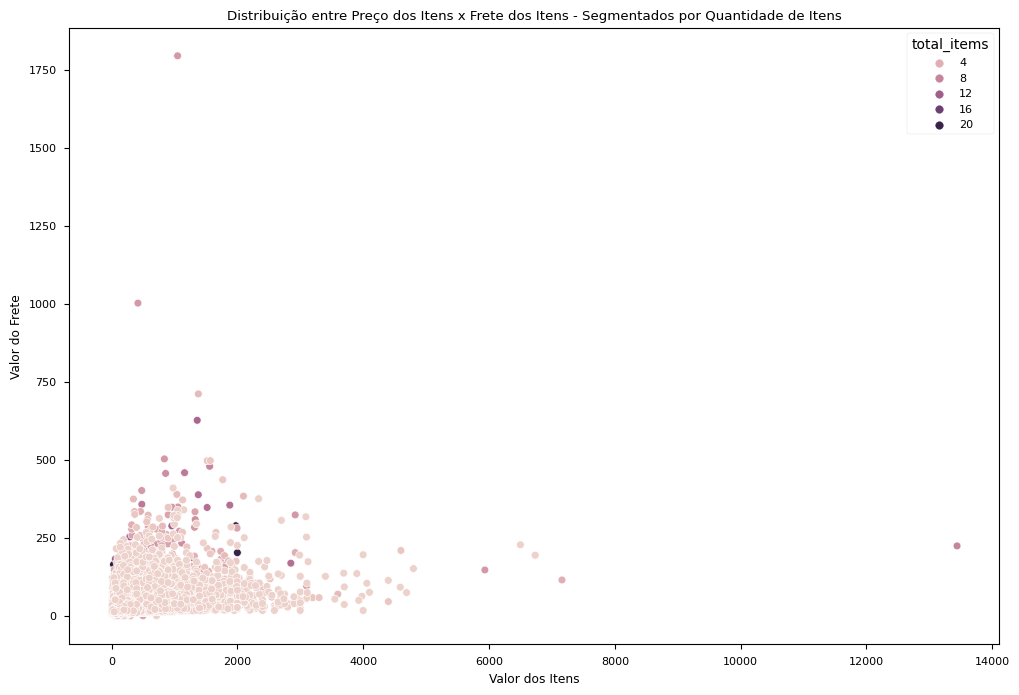

In [45]:
plt.title('Distribuição entre Preço dos Itens x Frete dos Itens - Segmentados por Quantidade de Itens')
sns.scatterplot(df_cost_items_order, hue='total_items', x='total_price', y='total_freigth')
plt.xlabel('Valor dos Itens')
plt.ylabel('Valor do Frete')
plt.show()

In [46]:
order_id = '53cdb2fc8bc7dce0b6741e2150273451'
df_order[df_order['order_id'] == order_id]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [47]:
df_order_items.loc[df_order_items['order_id'] == order_id]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
36896,53cdb2fc8bc7dce0b6741e2150273451,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76


In [48]:
#order_purchase_timestamp: data/hora de compra do pedido
#order_approved_at: pedido aprovado em
#shipping_limit_date: data limite de envio
#order_delivered_carrier_date: pedido entregue (data da transportadora)
#order_delivered_customer_date: pedido entregue (data do cliente)


In [65]:
df_delivery_items = pd.merge(df_delivery, df_cost_items_order, how='inner', on='order_id')
df_delivery_items['total_item'] = df_delivery_items['total_price'] + df_delivery_items['total_freigth']
df_delivery_items.sort_values(by='total_items', ascending=False)

,order_id,order_created_at,time_to_approve,time_to_carrier,time_to_delivery,time_total,customer_id,order_status,total_items,total_price,total_freigth,total_item
88155,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,24.099444,69.341667,266.285833,359.726944,fc3d1daec319d62d49bfb5e1f83123e9,delivered,21,31.80,164.37,196.17
93295,ab14fdcfbe524636d65ee38360e22ce8,2017-08-23 09:22:34,29.130278,29.620278,184.090833,242.841389,bd5d39761aa56689a265d95d8d32b8be,delivered,20,1974.00,288.80,2262.80
86295,1b15974a0141d54e36626dca3fdc731a,2018-02-22 15:30:41,35.829444,140.959444,87.073889,263.862778,be1b70680b9f9694d8c70f41fa3dc92b,delivered,20,2000.00,202.40,2202.40
30086,428a2f660dc84138d969ccd69a0ab6d5,2017-11-23 20:30:52,14.005000,102.186389,363.620556,479.811944,10de381f8a8d23fff822753305f71cae,delivered,15,982.35,243.30,1225.65
65927,9ef13efd6949e4573a18964dd1bbe7f5,2017-01-30 21:44:49,0.815556,40.006944,308.233333,349.055833,adb32467ecc74b53576d9d13a5a55891,delivered,15,765.00,18.00,783.00
...,...,...,...,...,...,...,...,...,...,...,...,...
34614,eb8f24cf4aa474bfe99c062aff65c4c9,2018-03-15 15:11:08,12.233611,93.893333,16.414722,122.541667,c93425583027046f9893dcd578aa6e22,delivered,1,14.20,7.39,21.59
34613,b3312a188dae0d167f15c025aab9852a,2017-07-13 15:13:15,0.204722,5.063056,141.493056,146.760833,24c75f9811e066333bad50ce22419e1c,delivered,1,106.90,14.48,121.38
34611,7f3a98ba983d8671d25c8cbcae5e9ee1,2017-04-17 19:55:27,0.246667,62.898611,428.998333,492.143611,fa26a55a2ee9fa2fd44b421a6e41e153,delivered,1,449.00,36.51,485.51
34610,124282aeb36f71699a910e0670c08769,2018-06-04 21:09:34,30.025278,34.265278,197.531667,261.822222,77089f53d5c42c03dc08dad99b373989,delivered,1,49.90,26.43,76.33


In [66]:
df_delivery_items.groupby(by='customer_id').size().sort_values(ascending=False)

customer_id
00012a2ce6f8dcda20d059ce98491703    1
aa33d697a2f5ee04aae5e9a8227e913e    1
aa5f8aa4c21fe89a04e8d221d4cd8ac1    1
aa5f87b79875f43b90b310decb62356e    1
aa5f5931b8901ae1ca4b8302f9b94c02    1
                                   ..
5582a1c42a6723f0fdbb6dccb54693ae    1
5581f26ba2dcb90e8c250e0850c66172    1
55814b1c0dcf038f760c8f30b1b1d430    1
5581302de852c09823ec2e0fd3c46d82    1
ffffa3172527f765de70084a7e53aae8    1
Length: 98666, dtype: int64

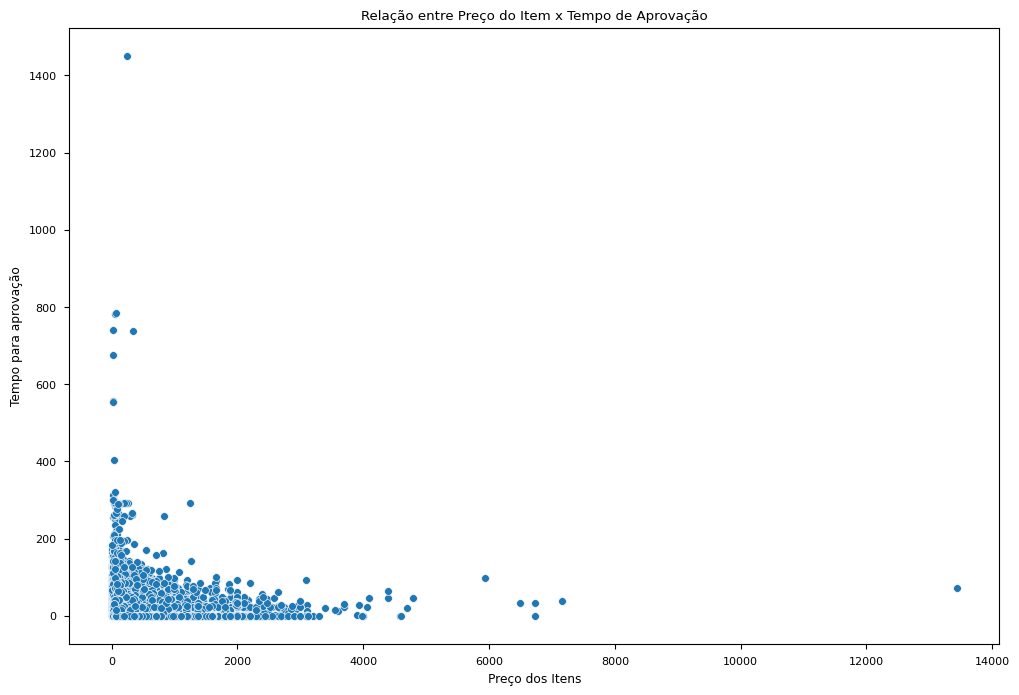

In [67]:
plt.title('Relação entre Preço do Item x Tempo de Aprovação')
sns.scatterplot(df_delivery_items, y='time_to_approve', x='total_price')
plt.xlabel('Preço dos Itens')
plt.ylabel('Tempo para aprovação')
plt.show()

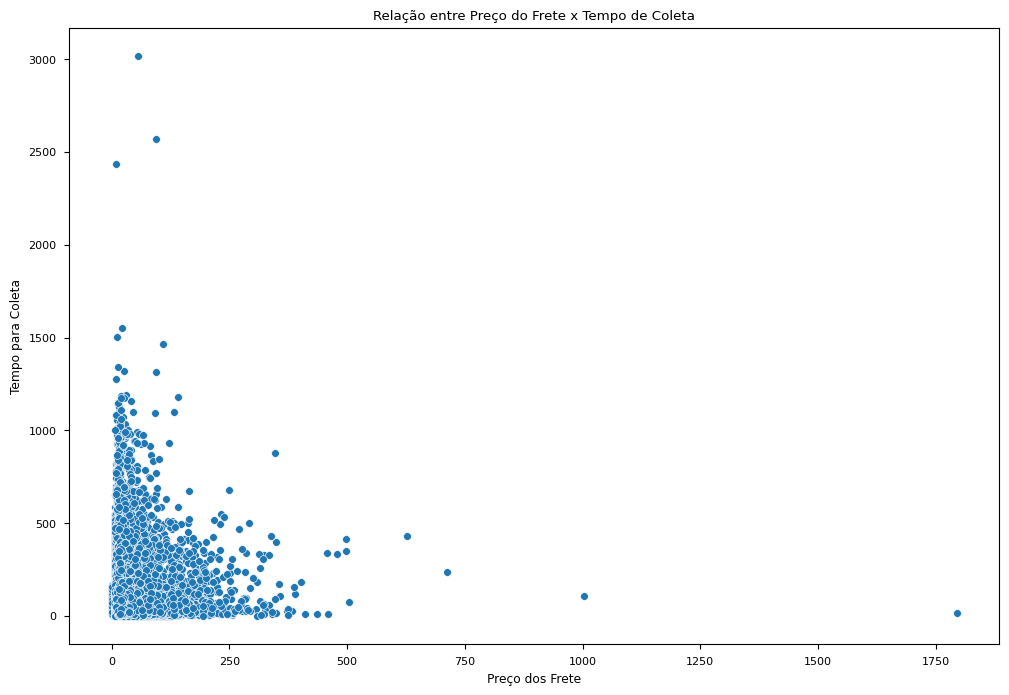

In [68]:
plt.title('Relação entre Preço do Frete x Tempo de Coleta')
sns.scatterplot(df_delivery_items, y='time_to_carrier', x='total_freigth')
plt.xlabel('Preço dos Frete')
plt.ylabel('Tempo para Coleta')
plt.show()

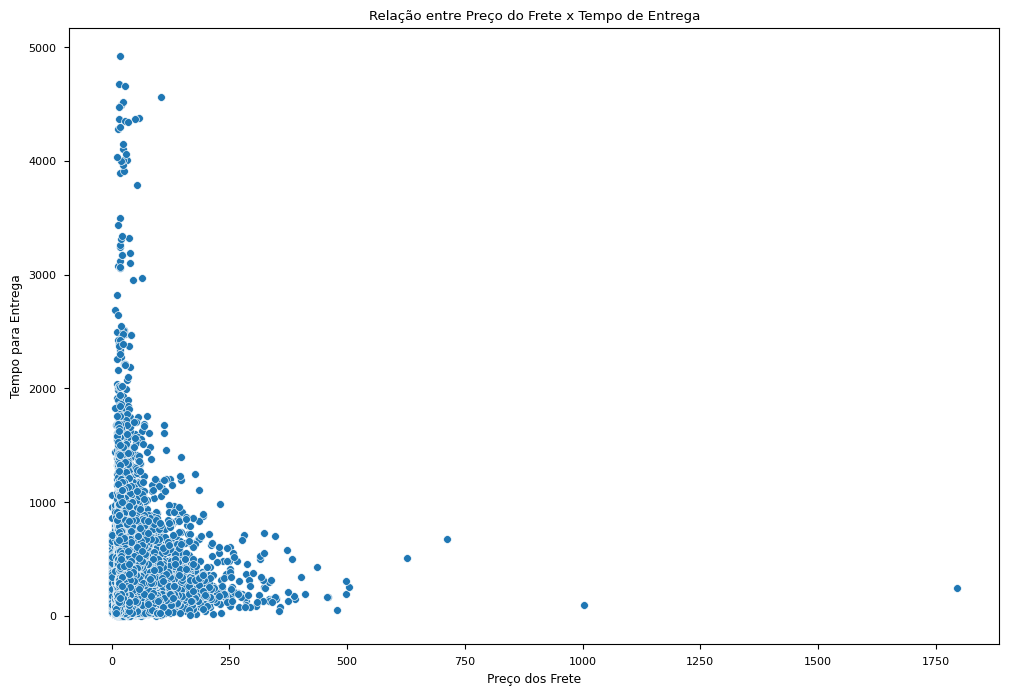

In [69]:
plt.title('Relação entre Preço do Frete x Tempo de Entrega')
sns.scatterplot(df_delivery_items, y='time_to_delivery', x='total_freigth')
plt.xlabel('Preço dos Frete')
plt.ylabel('Tempo para Entrega')
plt.show()

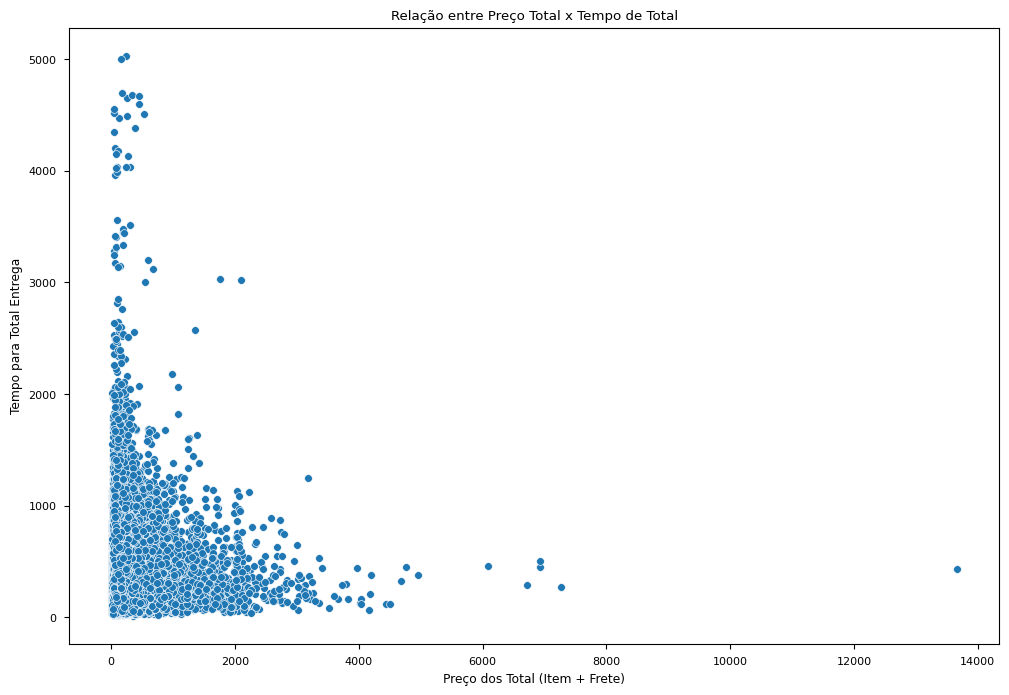

In [70]:
plt.title('Relação entre Preço Total x Tempo de Total')
sns.scatterplot(df_delivery_items, y='time_total', x='total_item')
plt.xlabel('Preço dos Total (Item + Frete)')
plt.ylabel('Tempo para Total Entrega')
plt.show()